
*Unit 4, Sprint 1, Module 1*

---
<h1 id="moduleTitle"> Natural Language Processing Introduction (Prepare)</h1>

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently.
    

<h2 id='moduleObjectives'>Learning Objectives</h2>

By the end of end of this module, a student should be able to:
* <a href="#p1">Objective 1</a>: Tokenize text
* <a href="#p1">Objective 2</a>: Remove stop words from text
* <a href="#p3">Objective 3</a>: Perform stemming and lemmatization on tokens

## Conda Environments (OMIT)

You will be completing each module this sprint on your machine. We will be using conda environments to manage the packages and their dependencies for this sprint's content. In a classroom setting, instructors typically abstract away environment for you. However, environment management is an important professional data science skill. We showed you how to manage environments using pipvirtual env during Unit 3, but in this sprint, we will introduce an environment management tool common in the data science community:

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

The easiest way to install conda on your machine is via the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python & R. Once you have conda installed, read ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533). This article will provide an introduce into some of the conda basics. If you need some additional help getting started, the official ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) guide will point you in the right direction.

:snake:

To get the sprint environment setup:

1. Open your command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
2. Navigate to the folder with this sprint's content. There should be a `requirements.txt`
3. Run `conda create -n U4-S1-NLP python==3.7` => You can also rename the environment if you would like. Once the command completes, your conda environment should be ready.
4. Now, we are going to add in the require python packages for this sprint. You will need to 'activate' the conda environment: `source activate U4-S1-NLP` on Terminal or `conda activate U4-S1-NLP` on Anaconda Prompt. Once your environment is activate, run `pip install -r requirements.txt` which will install the required packages into your environment.
5. We are going to also add an Ipython Kernel reference to your conda environment, so we can use it from JupyterLab.
6. Next run `python -m ipykernel install --user --name U4-S1-NLP --display-name "U4-S1-NLP (Python3)"` => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python. :)
7. Last step, we need to install the models for Spacy. Run these commands `python -m spacy download en_core_web_md` and `python -m spacy download en_core_web_lg`
8. Deactivate your conda environment and launch JupyterLab. You should know see "U4-S1-NLP (Python3)" in the list of available kernels on launch screen.

# 0. Colab notebook setup
Start running the notebook here.

## 0.1 Download the required spacy module that we'll use later
*Note -- you need to restart the runtime right after running this cell!*

In [1]:
%%time
# You'll use en_core_web_sm for the sprint challenge due memory constraints on Codegrader
#!python -m spacy download en_core_web_sm

# Locally (or on colab) let's use en_core_web_lg
!python -m spacy download en_core_web_md # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!
#      or else Colab won't find spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 38.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
CPU times: user 45 ms, sys: 10.4 ms, total: 55.4 ms
Wall time: 17.2 s


## 0.2 Restart the runtime!
Click on "Runtime" in the menu bar, and select "Restart runtime" from the dropdown menu.

## 0.3 Install dependencies

In [2]:
# Dependencies for the week (instead of conda)
# Run if you're using colab, otherwise you should have a local copy of the data
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2025-09-10 15:16:39--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     132  --.-KB/s    in 0s      

2025-09-10 15:16:40 (6.08 MB/s) - ‘requirements.txt’ saved [132/132]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 26.5

##0.4 Import libraries and load packages

In [1]:
%%time
"""
Import Statements
"""

# Base
from collections import Counter
import re
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

CPU times: user 6.08 s, sys: 827 ms, total: 6.9 s
Wall time: 7.24 s


## 0.5 Get the Amazon reviews data and `unzip` it
We can access the Amazon reviews data in this Colab notebook by cloning the `Unit-4-Sprint-1` repo!

In [2]:
# clone the Unit-4-Sprint-1 repo
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP.git
# Find the path to the reviews data zip file, using the file icon on the left sidebar
!unzip /content/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip

Cloning into 'DS-Unit-4-Sprint-1-NLP'...
remote: Enumerating objects: 1746, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 1746 (delta 117), reused 155 (delta 88), pack-reused 1532 (from 1)
Receiving objects: 100% (1746/1746), 60.07 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (286/286), done.
Archive:  /content/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


In [3]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
df['reviews.text'][100]

"As a teacher, I need tons of batteries, but I refused to spend excessive amounts on them, so I figured this was the best option! They are long-lasting, worth the money, cute (if that even matters, lol)! You won't find a deal like this in stores!I highly recommend!"

In [5]:
df['primaryCategories'][100]

'Health & Beauty'

In [6]:
df['reviews.rating'][100]

5

In [7]:
type(df['reviews.text'][100])

str

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

# 1. Tokenization and Text Preprocessing, Part 1
<a id="p1"></a>

## Overview

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


### The attributes of good tokens

* Should be stored in an iterable data structure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

Let's pretend we are trying analyze the random sequence here. Question: what is the most common character in this sequence?

In [9]:
random_seq = "AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ"

A useful unit of analysis for us is going to be a letter or character

In [10]:
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


Our tokens are already "good": in an iterable datastructure, all the same case, and free of noise characters (punctuation, whitespace), so we can jump straight into analysis.

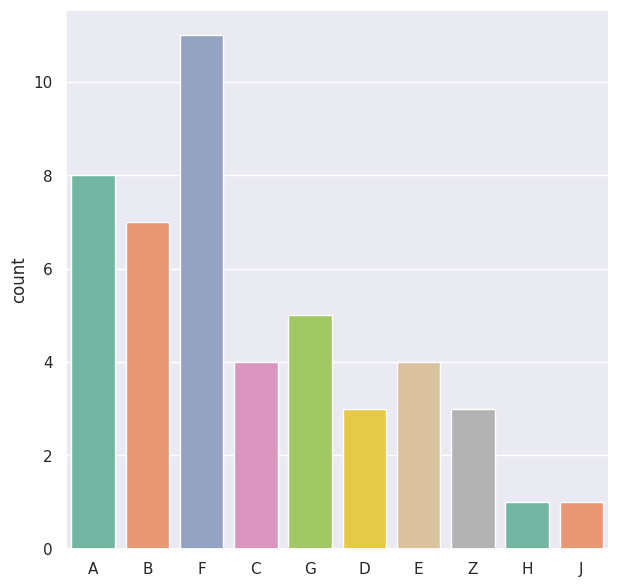

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(x=tokens, palette='Set2', hue=tokens);

The most common character in our sequence is  "F". We can't just glance at the the sequence to know which character is the most common. We (humans) struggle to subitize complex data (like random text sequences).

> __Subitize__ is the ability to tell the number of objects in a set, quickly, without counting.  

We need to chunk the data into countable pieces "tokens" for us to analyze them. This inability subitize text data is the motivation for our discussion today.

### 1.1 Tokenizing with Pure Python

In [13]:
sample = "Friends, Romans, countrymen, lend me your ears;"

In [14]:
sample2 = sample +'..., 911'
print(sample2)

Friends, Romans, countrymen, lend me your ears;..., 911


Use `regex` library

In [15]:
import re
re.sub('[^a-zA-Z 0-9]','', sample2)

'Friends Romans countrymen lend me your ears 911'

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to separate the whitespace and create iterable units. :)

In [16]:
sample.split()

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [17]:
sample.split(',')

['Friends', ' Romans', ' countrymen', ' lend me your ears;']

###1.2 Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example:

In [18]:
# Get the count of how many times each unique brand occurs
# Notice anything odd here?
print(df['brand'].unique())
print(df['brand'].value_counts())

['Amazonbasics' 'Amazon' 'AmazonBasics']
brand
Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: count, dtype: int64


#### Let's use `pandas` to fix the problem!
We `apply` the `.lower()` method

In [19]:
### BEGIN SOLUTION
df['brand'] = df['brand'].apply(lambda x: x.lower())
### END SOLUTION

# Much cleaner
df['brand'].value_counts()

,count
brand,
amazon,16153
amazonbasics,12179


###1.4 Using `regex` to remove punctuation
`regex` is a powerful mini- language that allows you to search and match patterns in strings. If you haven't used it before, no worries, now is your chance to learn a bit about it! As a software engineer you will find yourself using `regex` surprisingly often!


Read this excellent article [Easiest way to remember Regular Expressions (Regex)](https://towardsdatascience.com/easiest-way-to-remember-regular-expressions-regex-178ba518bebd) as a quick introduction! <br>

Also useful is the [regular expressions cheat sheet](https://www.dataquest.io/blog/regex-cheatsheet/)) from dataquest.io

Finally [regex101](https://regex101.com/) offers an interactive `regex` checker, where you can test whether your `regex` code does what you intended it to do!

#### First `regex` example
Suppose we want to keep only alphanumeric characters and spaces.
Everything else is probably noise: just punctuation, and other special characters. This one is little bit more complicated than our previous example. Here we will have to import the `regex` package `re` (regular expressions). <br>

The `regex` expression pattern for this task is `'[^a-zA-Z 0-9]'` which matches character which are **not** in the set {lower case letters, upper case letters, spaces, and numbers}

In [20]:
sample = sample + '..., 911'
print(sample)

Friends, Romans, countrymen, lend me your ears;..., 911


We'll use the `re.sub()` method to replace the characters matching that pattern with `''`, an empty string, effectively getting rid of them.

In [21]:
# replace (sub) "everything that is NOT lower-case or upper-case or numerical or space" with empty string ""
import re
sample = re.sub('[^a-zA-Z 0-9]', '', sample)

In [22]:
sample

'Friends Romans countrymen lend me your ears 911'

Next we can use `python`'s  `lower()` and `split()` methods <br>
to convert upper case characters to lower case, then split the string on whitespace, producing a list of tokens.

In [23]:
#split into words and lower case
sample.lower().split()

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears', '911']

Congratulations, you have just learned all the steps to clean and tokenize a text string!

### 1.5 Five Minute Challenge: build your own tokenizer
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean and tokenize a text string.
- Your function should remove punctuation and special characters, split the text string into words, and lower case all capital letters
- You can put the methods in any order you want

In [24]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """

    ### BEGIN SOLUTION
    tokens = re.sub('[^a-zA-Z ]', '', text).lower().split()
    ### END SOLUTION
    return tokens

In [25]:
# this should be your output
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

# 2. Tokenization and text preprocessing, part 2

Our inability to analyze text data becomes quickly amplified in a business context. Consider the following:

A business which sells widgets also collects customer reviews of those widgets. When the business first started out, they had a human read the reviews to look for patterns. Now, the business sells thousands of widgets a month. The human readers can't keep up with the pace of reviews to synthesize an accurate analysis. They need some science to help them analyze their data.

Now, let's pretend that business is Amazon, and the widgets are Amazon products such as the Alexa, Echo, or other AmazonBasics products. Let's analyze their reviews with some counts. This dataset is available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [26]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


###  2.1 Counting word occurrences

In [27]:
# Counting occurrences of words in the raw text
df['reviews.text'].value_counts()[:10]

,count
reviews.text,
good,60
great,49
Good,42
Great,38
ok,33
Great price,30
great price,28
Excellent,28
Great value,27


In [28]:
# Counting fractional word occurrences (divide by total number of words)
# Look at the first 10 reviews
df['reviews.text'].value_counts(normalize=True)[:10]

,proportion
reviews.text,
good,0.002118
great,0.001729
Good,0.001482
Great,0.001341
ok,0.001165
Great price,0.001059
great price,0.000988
Excellent,0.000988
Great value,0.000953


### 2.2 Use your tokenizer to tokenize the reviews

In [29]:
### BEGIN SOLUTION

# tokenize reviews.text
df['tokens'] = df['reviews.text'].apply(tokenize)

### END SOLUTION

Document is a text string

In [30]:
df['reviews.text'].iloc[0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

Tokenized document is a list of tokens

In [31]:
df['tokens'].iloc[0]

['i',
 'order',
 'of',
 'them',
 'and',
 'one',
 'of',
 'the',
 'item',
 'is',
 'bad',
 'quality',
 'is',
 'missing',
 'backup',
 'spring',
 'so',
 'i',
 'have',
 'to',
 'put',
 'a',
 'pcs',
 'of',
 'aluminum',
 'to',
 'make',
 'the',
 'battery',
 'work']

Let's take a smaller subset of the data so that our demonstration codes will run faster.

In [32]:
# view count of primaryCategories
df['primaryCategories'].value_counts()

,count
primaryCategories,
Electronics,13995
Health & Beauty,12071
"Toys & Games,Electronics",1676
"Office Supplies,Electronics",386
"Electronics,Media",185
Office Supplies,9
Animals & Pet Supplies,6
Home & Garden,2
"Electronics,Furniture",2


In [33]:
# Take a subset of the df where the only primaryCategories is Electronics
df = df[df['primaryCategories'] == 'Electronics'].copy()
print(df.shape)
df.head()

(13995, 25)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting..."
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[my, initial, impression, of, this, was, very,..."
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


In [34]:
df['tokens'][:5]

,tokens
8343,"[great, case, to, keep, everything, in, its, p..."
8344,"[after, discarding, and, getting, rid, of, bro..."
8345,"[a, few, dollars, more, but, i, am, boycotting..."
8346,"[my, initial, impression, of, this, was, very,..."
8347,"[pros, standard, echo, cons, older, generation..."


###2.3 Analyzing Tokens

In [35]:
# Object from Base Python
from collections import Counter

### BEGIN SOLUTION
# The object `Counter` takes an iterable, but you can instantiate an empty one and update it.
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

### END SOLUTION

[('the', 17725),
 ('and', 14010),
 ('it', 13116),
 ('to', 12752),
 ('for', 12227),
 ('i', 12039),
 ('a', 10502),
 ('is', 8508),
 ('this', 8113),
 ('my', 7918)]

In [36]:
type(word_counts)

collections.Counter



Below we have create a function `count()` which takes a corpus of tokenized documents <br>`df['tokens']` as its input and returns a dataframe of word counts and associated descriptive statistics.<br><br>

To understand this `count()` function, let's use a "top-down" approach: <br>
so first, we'll scroll down to and read "Summary of the descriptive token statistics",<br> then read the code cell below "Make our count object" and have a look at the dataframe that is produced.<br><br>
Keeping the structure of that dataframe in mind will make it easier to see what the `count()` function is doing.<br>
Let's go through the code below and understand it line by line:

In [37]:
def count(token_lists):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()

    # stores the number of docs that each token appears in
    appears_in_docs = Counter()

    total_docs = len(token_lists)

    for token_list in token_lists:
        # stores count of every appearance of a token
        word_counts.update(token_list)

        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in_docs.update(set(token_list))

    # build word count dataframe
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts
    wc = wc.sort_values(by='rank')
    wc['cumulative_fraction_of_total'] = wc['fraction_of_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])

    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

Note that we use `set(token_list)` to update the count in `appears_in_docs` <br>
In `python`, `{}` denotes a `set`, which is a list of **unique** values.<br>
Thus the Counter for a given word in `appears_in_docs` gets updated once each time that word is used in a document.<br>
So the `appears_in_docs` Counter registers the total number of documents each word appears in.

In [38]:
this_is_a_set = {1, 2, 2, 2, 3, 4, 5}
print(type(this_is_a_set))
print(this_is_a_set)

<class 'set'>
{1, 2, 3, 4, 5}


#### Summary of the descriptive token statistics

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus

`rank` Ranking of tokens by count

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token.

`appears_in_fraction_of_docs` Fraction of documents that token appears in

Make our `count` object

In [39]:
# Use the count function
wc  = count(df['tokens'])
print(wc.shape)
wc.head()

(8598, 7)


,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
20,the,7811,17725,1.0,0.041624,0.041624,0.558128
73,and,8545,14010,2.0,0.032900,0.074524,0.610575
4,it,7490,13116,3.0,0.030801,0.105324,0.535191
5,to,7137,12752,4.0,0.029946,0.135270,0.509968
38,for,7990,12227,5.0,0.028713,0.163983,0.570918


In [40]:
wc.tail()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
8592,havethen,1,1,8594.0,0.000002,0.999991,0.000071
8594,moztly,1,1,8595.0,0.000002,0.999993,0.000071
8595,itbetter,1,1,8596.0,0.000002,0.999995,0.000071
8596,showsmovies,1,1,8597.0,0.000002,0.999998,0.000071
8597,bookreader,1,1,8598.0,0.000002,1.000000,0.000071


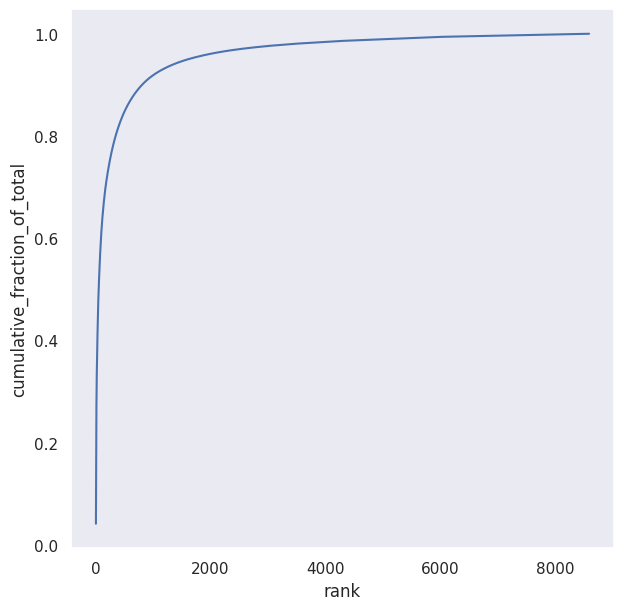

In [41]:
# Cumulative Distribution Plot
plt.figure(figsize=(7,7))
sns.lineplot(x='rank', y='cumulative_fraction_of_total', data=wc);
plt.grid()

In [42]:
wc[wc['rank'] <= 250]['cumulative_fraction_of_total']

,cumulative_fraction_of_total
20,0.041624
73,0.074524
4,0.105324
5,0.135270
38,0.163983
...,...
2003,0.753664
253,0.754246
2063,0.754826
72,0.755399


In [43]:
wc[wc['rank'] <= 100]['cumulative_fraction_of_total']

,cumulative_fraction_of_total
20,0.041624
73,0.074524
4,0.105324
5,0.135270
38,0.163983
...,...
162,0.612673
337,0.614385
1394,0.616083
2065,0.617757


### `squarify` shows the most frequent words

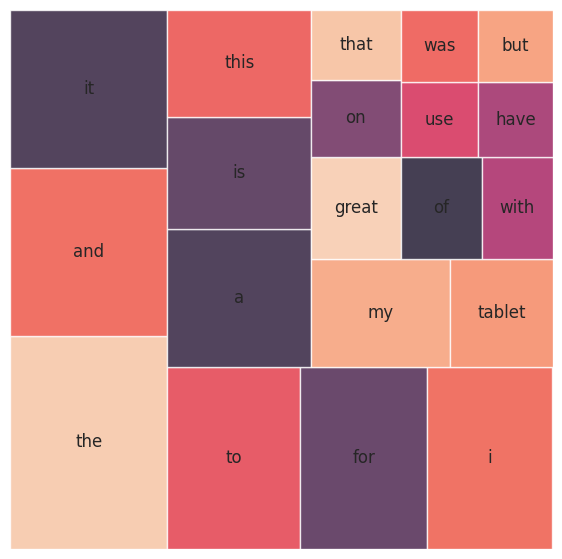

In [44]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(7,7))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### 2.4 Processing Raw Text with Spacy

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components in various data structures, Spacy indexes components and simply stores the lookup information.

This is often why Spacy is considered to be more production grade than a library like NLTK.

In [45]:
import spacy
nlp = spacy.load('en_core_web_md')

In [46]:
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Natural Language Processing is a field that covers computer understanding and manipulation of human language, and it’s ripe with possibilities for news gathering,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usually hear about it in the context of analyzing large pools of legislation or other document sets, attempting to discover patterns or root out corruption.”
"""

In [47]:
sample

'\nNatural Language Processing Summary\nThe field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).\n\n“Natural Language Processing is a field that covers computer understanding and manipulation of human language, and it’s ripe with possibilities for news gathering,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usually hear about it in the context of analyzing large pools of legislation or other document sets, attempting to discover patterns or root out corruption.”\n'

In [48]:
doc = nlp(sample)
doc


Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Natural Language Processing is a field that covers computer understanding and manipulation of human language, and it’s ripe with possibilities for news gathering,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usually hear about it in the context of analyzing large pools of legislation or other document sets, attempting to discover patterns or root out corruption.”

In [49]:
print(type(doc))
dir(doc)

<class 'spacy.tokens.doc.Doc'>


['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment'

Let's create a tokenizer using `spacy`

In [50]:
%%time
# create a tokenizer using spacy

### BEGIN SOLUTION
tokens = []
for doc in nlp.pipe(df['reviews.text']):

  doc_tokens = []

  for token in doc:
    doc_tokens.append(token.text)

  tokens.append(doc_tokens)

# save tokens to df
df['spacy_tokens'] = tokens

### END SOLUTION

CPU times: user 1min 16s, sys: 855 ms, total: 1min 16s
Wall time: 1min 19s


In [51]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens,spacy_tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p...","[Great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro...","[After, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting...","[A, few, dollars, more, ,, but, I, am, boycott..."
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[my, initial, impression, of, this, was, very,...","[My, initial, impression, of, this, was, very,..."
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation...","[Pros, :, Standard, Echo, ., Cons, :, Older, g..."


Using `squarify` we can graphically display occurrence rates for the most common tokens

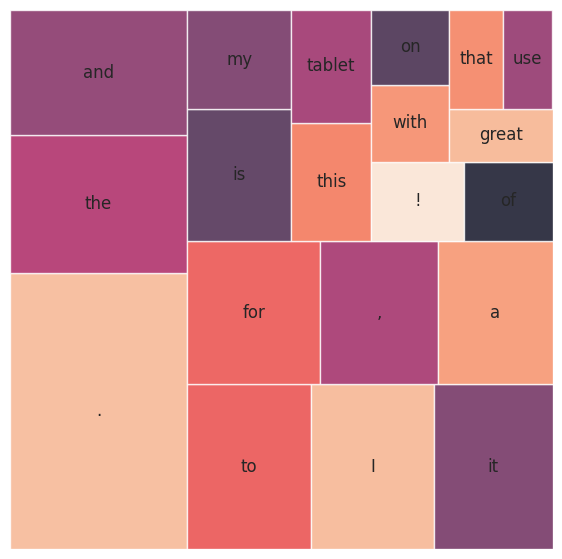

In [52]:
# pass df through count for stats
wc = count(df['spacy_tokens'])

# sort and keep top 20 tokens for plotting
wc_top20 = wc[wc['rank'] <= 20]

# plot stats
plt.figure(figsize=(7,7))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

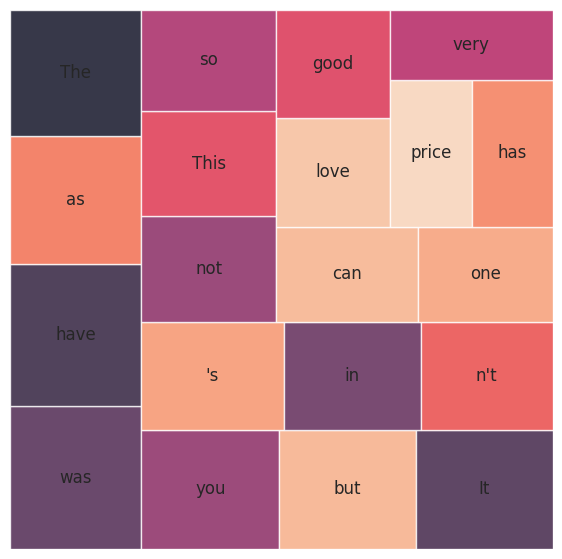

In [53]:
wc_next20 = wc[(wc['rank'] > 20) & (wc['rank'] <= 40)]

# plot stats
plt.figure(figsize=(7,7))
squarify.plot(sizes=wc_next20['fraction_of_total'], label=wc_next20['word'], alpha=.8 )
plt.axis('off')
plt.show()

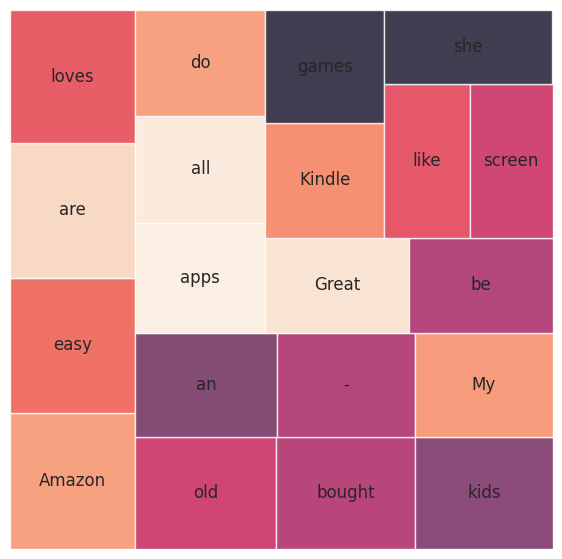

In [54]:
wc_3rd20 = wc[(wc['rank'] > 40) & (wc['rank'] <= 60)]

# plot stats
plt.figure(figsize=(7,7))
squarify.plot(sizes=wc_3rd20['fraction_of_total'], label=wc_3rd20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

In the module project, you will apply tokenization to another set of review data and produce visualizations of those tokens!

# 3. Stop Words (Learn)
<a id="p2"></a>

## Overview
Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our understanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis.

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding.

## Follow Along

### Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [55]:
# Spacy's Default Stop Words
print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))

{'last', 'never', 'what', "'re", 'the', 'itself', 'each', 'all', 'by', 'to', 'those', 'which', 'fifty', 'another', 'next', 'whereas', 'around', 'eleven', 'thereupon', 'bottom', 'ten', '‘ll', "n't", 'into', 'done', 'enough', 'some', 'between', "'m", 'its', 'should', 'latterly', 'make', 'several', 'unless', 'would', 'ca', 'often', 'well', '’m', 'serious', 'below', 'himself', 'moreover', 'more', 'anyhow', 'or', 'up', 'onto', 'other', 'behind', 'everywhere', "'ll", 'except', 'thereafter', 'among', 'everything', 'becomes', 'really', 'not', 'please', 'nor', 'anywhere', 'on', 'herself', 'much', 'few', 'both', 'twelve', 'less', 'take', 'move', 'already', 'off', '’s', 'go', 'somehow', 'myself', 'during', 'formerly', 'together', 'his', 'so', 'n‘t', 'at', 'whereafter', 'upon', 'for', 'whose', 'in', 'becoming', 'n’t', 'being', 'him', 'seeming', 'ours', 'seemed', 'see', 'whenever', 'call', 'front', '‘m', 'full', 'an', 'indeed', 'of', 're', 'whither', 'without', 'further', 'now', 'herein', 'along', 

Let's improve our `spacy` tokenizer by removing stop words and punctuation and lower-casing the tokens

In [56]:
%%time
# Use spacy to create a tokenizer that removes stop words

tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(df['reviews.text']):

    doc_tokens = []

    for token in doc:
        if (not token.is_stop) & (not token.is_punct):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['spacy_tokens_v2'] = tokens

CPU times: user 1min 12s, sys: 490 ms, total: 1min 13s
Wall time: 1min 13s


In [58]:
df['spacy_tokens_v2'].head()

,spacy_tokens_v2
8343,"[great, case, place, husband, love, holds, lot..."
8344,"[discarding, getting, rid, broken, cd, cases, ..."
8345,"[dollars, boycotting, amazon]"
8346,"[initial, impression, good, material, nicer, s..."
8347,"[pros, standard, echo, cons, older, generation..."


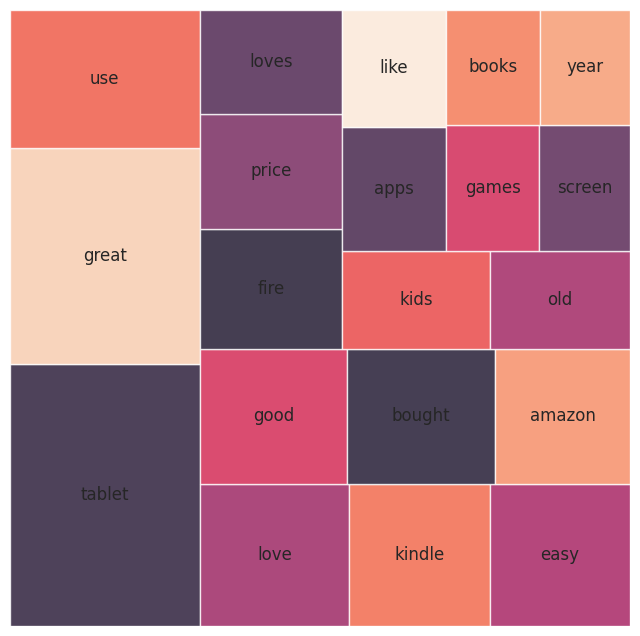

In [59]:
# plot the stats
# pass tokens through count function
wc = count(df['spacy_tokens_v2'])

# sort and keep the top 20 words
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Extending Stop Words

In [60]:
print(type(nlp.Defaults.stop_words))
print(len(nlp.Defaults.stop_words))

<class 'set'>
326


In [61]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])
print(len(STOP_WORDS))

332


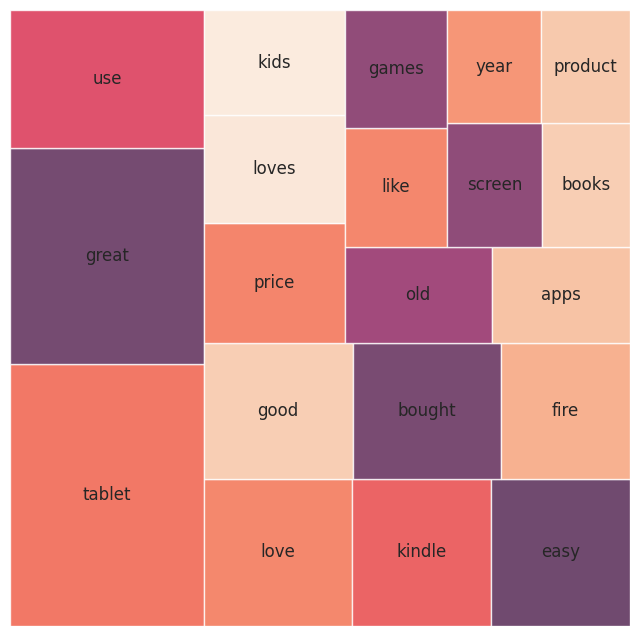

In [74]:
# use spacy to create a tokenizer that removes stopwords using STOP_WORDS

tokens = []
for doc in nlp.pipe(df['reviews.text'], batch_size=500):

    doc_tokens = []

    for token in doc:
        if (not token.is_punct) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['spacy_tokens_v3'] = tokens

wc = count(df['spacy_tokens_v3'])
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data.

Do you remember this graph?

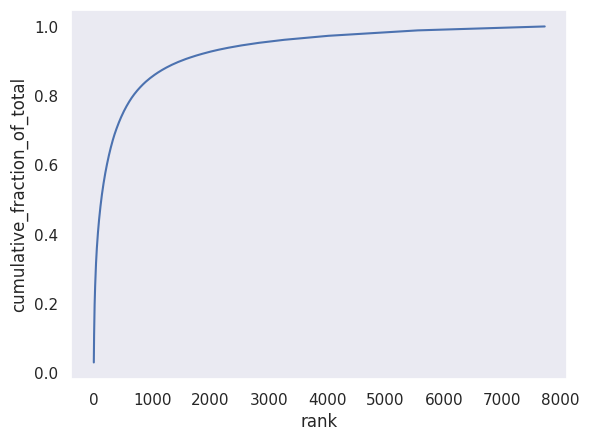

In [75]:
sns.lineplot(x='rank', y='cumulative_fraction_of_total', data=wc);
plt.grid()

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways:
1. The words that appear most frequently may not provide any insight into the mean on the documents since they are so prevalent.
2. Words that appear infrequency (at the end of the graph) also probably do not add much value, because the are mentioned so rarely.

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

/tmp/ipython-input-280555345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wc['appears_in_fraction_of_docs']);


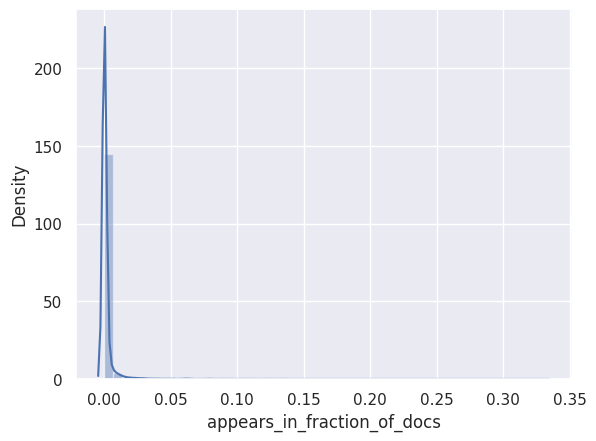

In [76]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_fraction_of_docs']);

(7726, 7)
(251, 7)


/tmp/ipython-input-2262035651.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wc['appears_in_fraction_of_docs']);


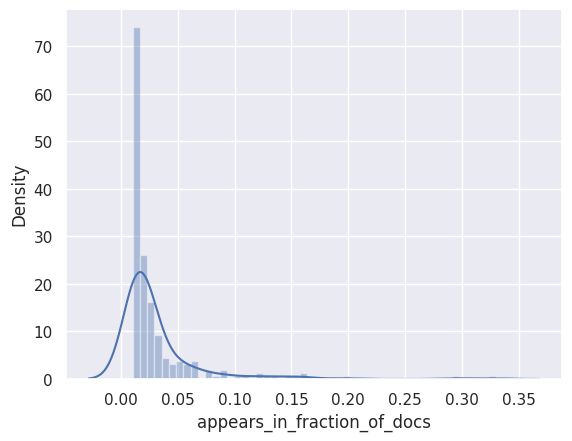

In [77]:
# Tree-Map w/ Words that appear in at least 1% of documents.
print(wc.shape)
wc = wc[wc['appears_in_fraction_of_docs'] >= 0.01]
print(wc.shape)
sns.distplot(wc['appears_in_fraction_of_docs']);

In [83]:
wc.tail()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
1223,help,141,146,250.0,0.000761,0.620984,0.010075
1222,takes,140,144,254.0,0.000751,0.623997,0.010004
1188,speed,140,143,258.0,0.000745,0.626983,0.010004
2158,library,140,142,262.0,0.000740,0.629949,0.010004
1950,present,140,141,263.0,0.000735,0.630684,0.010004


## Challenge

In the module project, you will apply stop word removal to a new corpus. You will focus on applying dictionary based stop word removal, but as a stretch goal, you should consider applying statistical stopword trimming.

# 4. Stemming & Lemmatization (Learn)
<a id="p3"></a>

## Overview

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word.

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations
- how to do it in spacy & nltk
- introduce PoS in here as well

## Follow Along

### 4.1 Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming.

In [84]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["is", "was", "be", "are", "messed", "mess", "feed", "mixed", "tied", "learned", "wanted", "tried", "finds", "learning"]

for word in words:
    print(ps.stem(word))

is
wa
be
are
mess
mess
feed
mix
tie
learn
want
tri
find
learn


### 4.1.1 Five Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

100%|██████████| 13995/13995 [00:04<00:00, 3308.75it/s]


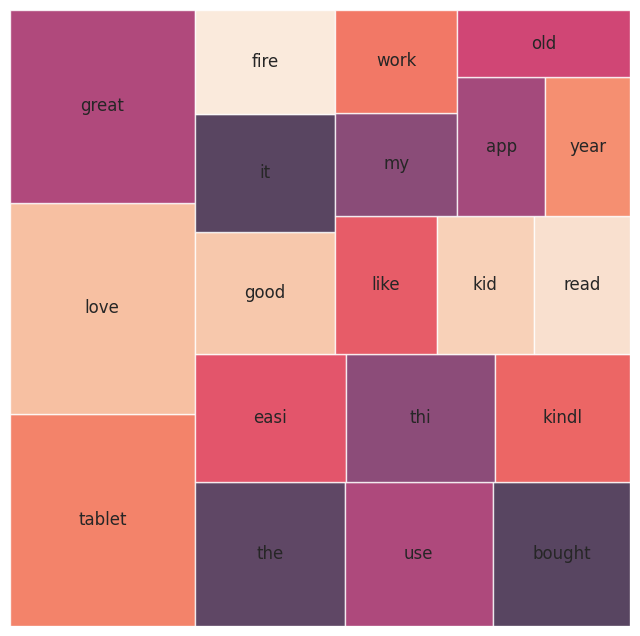

In [85]:
from tqdm import tqdm
tqdm.pandas()

### BEGIN SOLUTION

# Put in a new column `stems`
def get_stems(text):

    return [ps.stem(word) for word in text.split() if word not in STOP_WORDS]

df['stems'] = df['reviews.text'].progress_apply(get_stems)

### END SOLUTION

wc = count(df['stems'])
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### 4.2 Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrieval algorithms use stemming. Why? Because it's fast.

Lemmatization on the other hand is more methodical. The goal is to transform a word into its base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

In [86]:
sent = "men man women woman wolf wolves run runs running go going went gone"
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "\t", token.lemma_)

men 	 man
man 	 man
women 	 woman
woman 	 woman
wolf 	 wolf
wolves 	 wolf
run 	 run
runs 	 run
running 	 run
go 	 go
going 	 go
went 	 go
gone 	 go


In [87]:
# spacy document object
type(doc)

spacy.tokens.doc.Doc

In [88]:
# spacy token object
type(doc[0])

spacy.tokens.token.Token

Let's write a function to create tokens using the `spacy` lemmatizer

In [89]:
# Re-load nlp without parser/tagger to speed up pipeline
nlp = spacy.load('en_core_web_md', disable=['parser', 'tagger'])

In [90]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    doc = nlp(text)

    ### BEGIN SOLUTION
    for token in doc:
      if ((not token.is_stop) and (not token.is_punct) and (token.pos_ != 'PRON')):
        lemmas.append(token.lemma_.lower())
    ### END SOLUTION

    return lemmas

In [91]:
df['lemmas'] = df['reviews.text'].progress_apply(get_lemmas)

  0%|          | 0/13995 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 13995/13995 [02:29<00:00, 93.91it/s] 


In [92]:
cols = ['lemmas', 'reviews.text']
df[cols].head()

,lemmas,reviews.text
8343,"[great, case, place, husband, love, holds, lot...",Great case to keep everything in its place! My...
8344,"[discarding, getting, rid, broken, cd, cases, ...",After discarding and getting rid of broken cd ...
8345,"[dollars, boycotting, amazon]","A few dollars more, but I am boycotting amazon"
8346,"[initial, impression, good, material, nicer, s...",My initial impression of this was very good. T...
8347,"[pros, standard, echo, cons, older, generation...",Pros: Standard Echo. Cons: Older generation Ec...


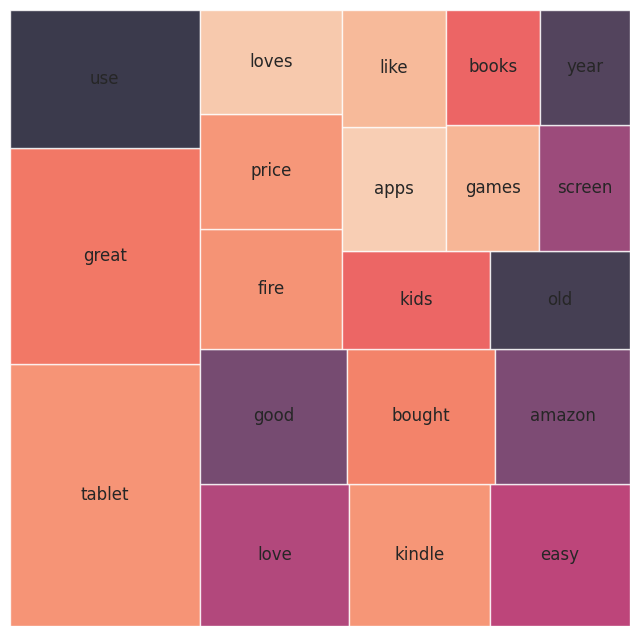

In [93]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

(7727, 7) (5103, 7) (2545, 7)


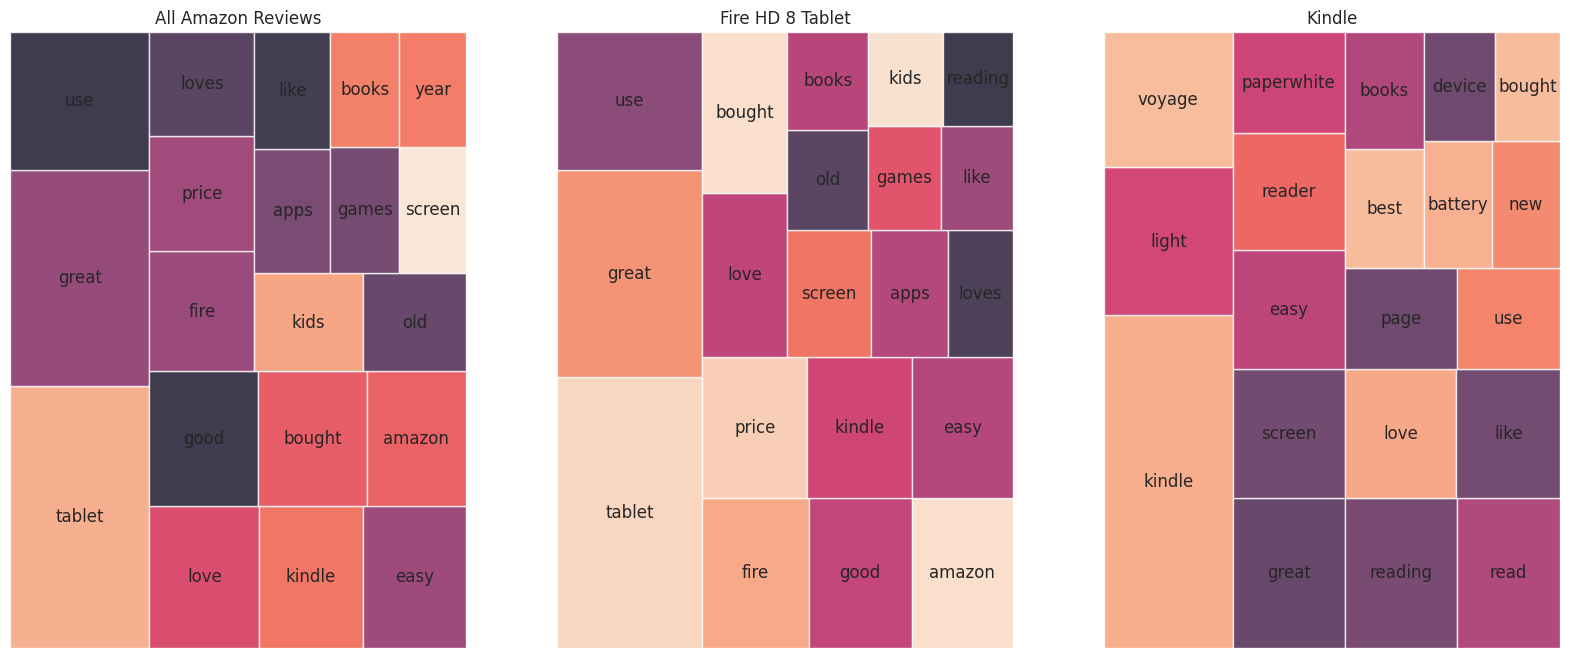

In [94]:
# To make this comparison more interesting, let's compare: All Amazon Reviews, Fire HD 8 only, and Kindle only
df['FireHD_8'] = df['name'].str.contains('fire hd 8', case=False)
df['Kindle'] = df['name'].str.contains('kindle', case=False)

# Use the Function for all reviews, Fire HD 8 only, and Kindle only
wc = count(df['lemmas'])
wc_fire_hd_8 = count(df[df['FireHD_8'] == True]['lemmas'])
wc_kindle = count(df[df['Kindle'] == True]['lemmas'])
print(wc.shape, wc_fire_hd_8.shape, wc_kindle.shape)

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_fire_top20 = wc_fire_hd_8[wc_fire_hd_8['rank'] <= 20]
wc_kindle_top20 = wc_kindle[wc_kindle['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Amazon Reviews')
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Fire HD 8 Tablet')
squarify.plot(sizes=wc_fire_top20['fraction_of_total'], label=wc_fire_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Kindle')
squarify.plot(sizes=wc_kindle_top20['fraction_of_total'], label=wc_kindle_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text.

## (Bonus Material) ScatterText

To run this section, go to your terminal and execute:

- pip install scattertext

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text.

## Scattertext Kindle vs. FireHD Comparison

To run this section, go to your terminal and execute:

- pip install scattertext

In [95]:
!pip install scattertext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.0 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=01d11aebc6dc1019d78249a099d1715723ec1d5d0471aa60352b65a71873e6f3
  Stored in directory: /root/.cache/pip/wheels/8c/24/da/4d994d7a27cfc73a4e513a669fbeec4a71f871fe245a81977f
Successfully built flashtext


In [96]:
# Create a copy and add column with product tags
subset_df = df.copy()
subset_df.loc[subset_df['name'].str.contains('kindle', case=False), 'product'] = 'Kindle'
subset_df.loc[subset_df['name'].str.contains('fire hd 8', case=False), 'product'] = 'Fire HD 8'

# Drop Review that aren't Kindle/Fire HD 8
subset_df.dropna(subset=['product'], inplace=True)

# Confirm shape and distribution of reviews
print(subset_df.shape)
subset_df['product'].value_counts()

(7785, 33)


,count
product,
Fire HD 8,7146
Kindle,639


In [97]:
import spacy
import scattertext as st

nlp = spacy.load("en_core_web_md")

corpus = st.CorpusFromPandas(subset_df,
                             category_col='product',
                             text_col='reviews.text',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='Kindle',
    category_name='Kindle',
    not_category_name='Fire HD 8',
    width_in_pixels=1000,
    metadata=subset_df['reviews.rating'])

open('./kindle_vs_firehd8.html', 'w').write(html)

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")


2468597

# Review

In this module project, you've seen us apply Natural Language Processing techniques (tokenization, stopword removal, and lemmatization) to a corpus of Amazon text reviews. We analyzed those reviews using these techniques and discovered that Amazon customers are generally satisfied with the battery life of Amazon products and generally appear satisfied.

You will apply similar techniques to today's [module project assignment](https://colab.research.google.com/drive/1tAShxk2KAL0iMp5kC7JGk7UujOEuIuSI?usp=sharing) to analyze coffee shop reviews from yelp. Remember that the techniques of processing the text are just the beginning. There are many ways to slice and dice the data.

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf

## Advanced Resources & Techniques
- Named Entity Recognition (NER)
- Dependency Trees
- Generators
- Major libraries (NLTK, Spacy, Gensim)
